# Code to simulate LMG Model
We have the following Hamiltonian
\begin{align}
H&=-\frac{J}{N}\sum_{i<j}\gamma_z \sigma_{i}^{z}\sigma_{j}^{z}+\gamma_y \sigma_{i}^{y}\sigma_{j}^{y}-\Gamma\sum_{i}\sigma_{i}^{x}
\end{align}
This reduces to (See ~/Dropbox/Research_Projects_Current/LMG_quench/LMG_quench.lyx),
\begin{equation}
\frac{J}{2}\left(\gamma_{z}-\frac{\gamma_{y}N}{2}\right)-\frac{J\left(2\gamma_{z}-\gamma_{y}\right)}{N}S_{z}^{2}+\frac{J\gamma_{y}}{2N}\left(S_{+}^{2}+S_{-}^{2}\right)-\Gamma\left(S_{+}+S_{-}\right)
\end{equation}
with the matrix elements,
\begin{align}
\left\langle S=\frac{N}{2},M\right|H\left|S=\frac{N}{2},M^{\prime}\right\rangle 	=&\delta_{MM^{\prime}}\left[\frac{J}{2}\left(\gamma_{z}+\gamma_{y}\left(1-\frac{2S\left(S+1\right)}{N}\right)\right)-\frac{J\left(2\gamma_{z}-\gamma_{y}\right)}{N}M^{2}\right]+ \nonumber \\
	&\ \ \ \delta_{MM^{\prime}-2}\left[\frac{J\gamma_{y}}{2N}\sqrt{\left(S\left(S+1\right)-\left(M+2\right)\left(M+1\right)\right)\left(S\left(S+1\right)-M\left(M+1\right)\right)}\right]+\nonumber \\
	&\ \ \ \delta_{MM^{\prime}+2}\left[\frac{J\gamma_{y}}{2N}\sqrt{\left(S\left(S+1\right)-\left(M-2\right)\left(M-1\right)\right)\left(S\left(S+1\right)-M\left(M-1\right)\right)}\right]+\nonumber \\
	&\ \ \ \delta_{MM^{\prime}-1}\left[-\Gamma\sqrt{\left(S\left(S+1\right)-M\left(M+1\right)\right)}\right]+\nonumber \\
	&\ \ \ \delta_{MM^{\prime}+1}\left[-\Gamma\sqrt{\left(S\left(S+1\right)-M\left(M-1\right)\right)}\right]
\end{align}

In [3]:
#python stuff
import numpy as np
from scipy import linalg as LA
import scipy.sparse.linalg as spla
from scipy import optimize as OPT
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm 
from latex_envs.latex_envs import figcaption
from scipy.special import binom as bm
from sympy.physics.quantum.cg import CG
import numpy.matlib
#import chardet
import os
import h5py
#for Latex font on figures
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Roman']})
rc('text', usetex=True)

#LMG simulation
import mod_LMG_v1 as LMG #import module with all funcitons 

The parameters of the Hamiltonian are defined by a structure

Ham_params(N=100, S=50,J=1,γz=1.,γy=-0.5,Γ=1)


\textbf{ List of Functions in the Module mod_LMG_v1}

LMG_generateHam(paramvals) #Takes in the Ham_params object and outputs a matrix corresponding to the Hamiltonian
magnetizationϕ2(State,paramvals,Ax,Ay) # Takes in a state, and Ham_params object and output magnetization along the direction (Ax,Ay)

# I. Ground state properties
We look at the ground state phase diagram of the postquench Hamiltonian

## Magnetization as a function of $\Gamma$ and system size dependence
We plot the magnetization as a function of the magnetice field, and also obtain the system size dependence. The ground state is expected to show,
\begin{equation}
\langle m^2\rangle=L^{-2/3}
\end{equation}


In [7]:
#calculate magnetization as a function of magnetic field
#tests magnetizationz2
Γarr=np.linspace(0.,2,20) #Array of Z field (Γ)
Larr=np.arange(100,600,100)# Array of system size choose even
magϕsqlist=np.ones([np.size(Γarr),1]) #Array for storing calculates magnetization in the ϕ direction
criticalmagϕsqlist=np.ones([np.size(Larr),1]) #critical field as a function of L
for p in range(np.size(Γarr)):
    L=100
    print(p, end='\r', flush=True)
    paramvals=LMG.Ham_params(N=L,S=L/2,J=1,γz=1.,γy=-0.5,Γ=Γarr[p])   #generates an object with the parmaeters of the Hamiltonian
    Ham=LMG.LMG_generateHam(paramvals) #generates a matrix for the hamiltonian
    GSenergy,vec=spla.eigs(Ham,k=1,which="SR") #diagonalizing
    GState=vec[:,0]
    magzsq=LMG.magnetizationϕ2(GState,paramvals,1,0)
    magy[p]=LMG.magnetizationϕ2(GState,paramvals,0,1)
    magϕsqlist[p]=magzsq+magysq
for q in range(np.size(Larr)):
    L=Larr[q]
    print(q, end='\r', flush=True)
    paramvals=LMG.Ham_params(N=L,S=L/2,J=1,γz=0.,γy=1.,Γ=1) 
    Ham=LMG.LMG_generateHam(paramvals)
    GSenergy,vec=spla.eigs(Ham,k=1,which="SR")
    GState=vec[:,0]
    criticalmagzsqlist[q]=LMG.magnetizationϕ2(GState,paramvals,1,0)
    criticalmagysqlist[q]=LMG.magnetizationϕ2(GState,paramvals,0,1)
    criticalmagϕsqlist[q]=criticalmagzsqlist[q]+criticalmagysqlist[q]
criticalΓ=paramvals.J*max(paramvals.γz,paramvals.γy)

In [8]:
#fitting to system size dependence
#linear fit to data
logSϕ=np.log10(criticalmagϕsqlist)
logSz=np.log10(criticalmagzsqlist)
logSy=np.log10(criticalmagysqlist)
logx=np.log10(Larr)
mϕ,bϕ = np.polyfit(logx,logSϕ, 1)
mz,bz = np.polyfit(logx,logSz, 1)
my,by = np.polyfit(logx,logSy, 1)

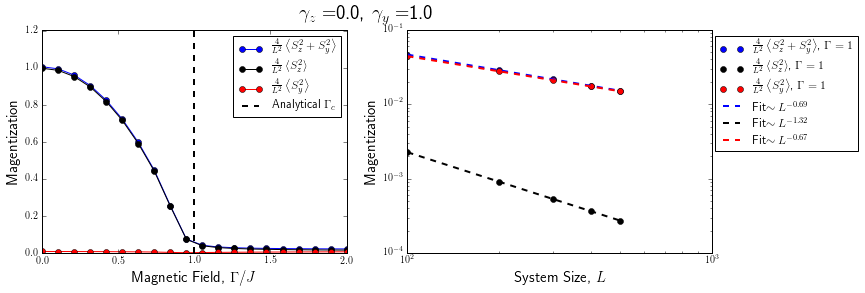

In [9]:
#plotting
plt.figure(figsize=(12,4))
plt.suptitle("$\\gamma_z=$"+str(paramvals.γz)+", $\\gamma_y=$"+str(paramvals.γy),fontsize=20)
plt.subplot(1,2,1)
plt.plot(Γarr, magϕsqlist,'-o',color='blue',label='$\\frac{4}{L^2}\\left\\langle S_z^2+S_y^2\\right\\rangle$')
plt.plot(Γarr, magzsqlist,'-o',color='black',label='$\\frac{4}{L^2}\\left\\langle S_z^2\\right\\rangle$')
plt.plot(Γarr, magysqlist,'-o',color='red',label='$\\frac{4}{L^2}\\left\\langle S_y^2\\right\\rangle$')
plt.axvline(criticalΓ,linestyle='dashed',color= 'black',label='Analytical $\\Gamma_c$',linewidth=2)
plt.ylim([0,np.max(magϕsqlist)+0.2])
plt.xlabel("Magnetic Field, $\\Gamma/J$",fontsize=15)
plt.ylabel("Magentization",fontsize=15)
plt.legend()
plt.subplot(1,2,2)
plt.loglog(Larr,criticalmagϕsqlist,'o',color='blue',label='$\\frac{4}{L^2}\\left\\langle S_z^2+S_y^2\\right\\rangle$, $\Gamma=1$')
plt.loglog(Larr,criticalmagzsqlist,'ko',color='black',label='$\\frac{4}{L^2}\\left\\langle S_z^2\\right\\rangle$, $\Gamma=1$')
plt.loglog(Larr,criticalmagysqlist,'ro',color='red',label='$\\frac{4}{L^2}\\left\\langle S_y^2\\right\\rangle$, $\Gamma=1$')
plt.loglog(Larr,(10**bϕ)*(Larr)**mϕ,'--',linewidth=2,color='blue',label='Fit$\\sim L^{%0.2f}$' % mϕ)
plt.loglog(Larr,(10**bz)*(Larr)**mz,'--',linewidth=2,color='black',label='Fit$\\sim L^{%0.2f}$' % mz)
plt.loglog(Larr,(10**by)*(Larr)**my,'--',linewidth=2,color='red',label='Fit$\\sim L^{%0.2f}$' % my)
plt.xlabel("System Size, $L$",fontsize=15)
plt.ylabel("Magentization",fontsize=15)
plt.legend(bbox_to_anchor=(1.5,1))
figcaption("(a)Magnetization as a function of magnetic field with dashed line showing analytical expectation (b) $L$ dependence of magnetization at the critical point. Seems like it agrees with $M^2\sim N^{-2/3}$")

# II. Quench Protocol-I : Critical quench
We start with an initial state and initial Hamiltonian,
\begin{align}
|\psi_{0}\rangle&=\text{Ground state of H_0} \\
\end{align}
In order to translate to notation in Mohammad's calculation and (Phys. Rev. B 74, 144423) we need to make a transformation that is done in LMG_quench.lyx.  

For the numerics we choose the parameters for the critical quench. We have the data for the following quenches
\begin{itemize}
\item $H_0$ is critical. $H_0\rightarrow \{ J_0=1$, $\gamma_{0z}=1$, $\gamma_{0y}=0$, $\Gamma=1\}$ to $H_f\rightarrow \{J=1$, $\gamma_z=0$, $\gamma_y=1$ $\Gamma=1\}$.
\item $H_0$ is critical. $H_0\rightarrow \{J_0=1$, $\gamma_{0z}=1$, $\gamma_{0y}=0$, $\Gamma=1\}$ to $H_f\rightarrow \{J=1$, $\gamma_z=1$, $\gamma_y=0.5$ $\Gamma=1\}$.
\item $H_0$ is deep in the paramagnetic phase. $H_0\rightarrow \{J_0=1$, $\gamma_{0z}=1$, $\gamma_{0y}=0$, $\Gamma=4\}$ to $H_f\rightarrow \{J=1$, $\gamma_z=0$, $\gamma_y=1$ $\Gamma=1\}$.
\end{itemize}


## A. Obtain time dependence of $\langle S_z^2+S_y^2\rangle $

In this section we focus on a particular system size, (say $L=100$) and plot the time dependence of the spin on th $y-z$ plane.



In [13]:
L=100 #Set system size.
paramvals0=LMG.Ham_params(N=L,S=L/2,J=1.,γz=1.,γy=0.,Γ=1.)
paramvalsf=LMG.Ham_params(N=L,S=L/2,J=1.,γz=0.,γy=1.,Γ=1.)
dt=0.2 #time step
Tf=20 # final time step
Nsteps=int(Tf/dt) 
tarr=np.arange(dt,Tf+dt,dt)
Azf=0.
Ayf=1.

In [14]:
#calcualte ground state and quench hamiltonian definitions
Ham=LMG.LMG_generateHam(paramvals0)
GSenergy,vec=spla.eigs(Ham,k=1,which="SR")
GState=vec[:,0]
Hamquench=LMG.LMG_generateHam(paramvalsf)
energyf,vecf=LA.eig(Hamquench)

In [15]:
#Calculate <Sϕ(t)Sϕ(t)>
magnetizationmat=LMG.time_evolved_Sϕ2_exact(GState,tarr,energyf,vecf,paramvals0,Azf,Ayf)
#LMG.save_data_Sϕ2t(paramvals0,paramvalsf,magnetizationmat,Azf,Ayf,GState,np.size(tarr),tarr[1]-tarr[0])

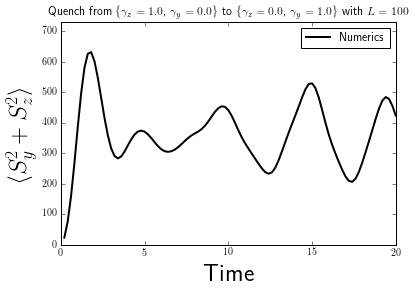

In [20]:
#plotting
plt.plot(tarr,magnetizationmat,'-',color='black',linewidth=2,label='Numerics')
plt.xlabel("Time",fontsize=25)
plt.ylabel("$\\langle S_y^2+S_z^2\\rangle$",fontsize=25)
plt.xlim(0,tarr[-1])
plt.ylim(0,np.max(magnetizationmat)+100)
plt.legend(numpoints=1,loc=1)#bbox_to_anchor=(1.5,1))
plt.title('Quench from \\{$\\gamma_z= %.1f $, $\\gamma_{y}= %.1f $\\} to \\{$\\gamma_z= %.1f $, $\\gamma_{y}= %.1f $\\} with $L=%d$'%(paramvals0.γz,paramvals0.γy, paramvalsf.γz,paramvalsf.γy,L))
figcaption("Time-dependence of the total spin for a system size $L=1000$ with the quench parameters shown in the figure. ")


## B. Two-time correlators : Quench problem

Here we have the code for the time-dependence of the correlator for the quench Hamiltonian

In [21]:
#two-time correlator definitions
Larr=np.array([100])
t1arr=np.array([20.])
t2arr=np.linspace(0,10,int((10-0)/0.2)+1)#np.linspace(10,50,int((50-10)/1.0)+1)
paramvals0=LMG.Ham_params(N=L,S=L/2,J=1.,γz=1.,γy=0.,Γ=4.)
paramvalsf=LMG.Ham_params(N=L,S=L/2,J=1.,γz=1.,γy=0.,Γ=1.)
Azf=1.
Ayf=0.

In [22]:
correlationmat=LMG.twotimecorrelation(paramvals0,t1arr,t2arr,GState,energyf,vecf,Azf,Ayf)

In [25]:
np.shape(t2arr)

(51,)

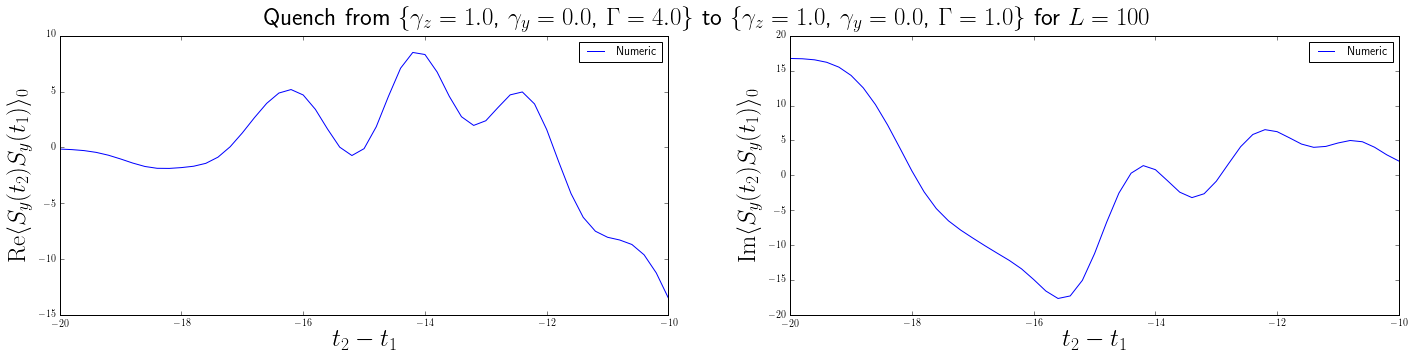

In [27]:
#plotting time dependence
plt.figure(figsize=[24,5])
plt.subplot(1,2,1)
plt.plot(t2arr-t1arr[0],np.real(np.transpose(correlationmat)),'-',label='Numeric')
#plt.plot(t2arr-t1arr[0],analytic_correlation_real,label='Analytic')
plt.xlabel('$t_2-t_1$',fontsize=25)
plt.ylabel('${\\rm Re}\\langle S_y(t_2)S_y(t_1)\\rangle_0$',fontsize=25)
plt.legend()
plt.subplot(1,2,2)
plt.plot(t2arr-t1arr[0],np.transpose(np.imag(correlationmat)),'-',label='Numeric')
#plt.plot(t2arr-t1arr[0],analytic_correlation_imag,label='Analytic')
plt.xlabel('$t_2-t_1$',fontsize=25)
plt.ylabel('${\\rm Im}\\langle S_y(t_2)S_y(t_1)\\rangle_0$',fontsize=25)
plt.legend()#bbox_to_anchor=(1.95,0.5),fontsize=25)
plt.suptitle('Quench from \\{$\\gamma_z= %.1f $, $\\gamma_{y}= %.1f $, $\Gamma=%.1f $\\} to \\{$\\gamma_z= %.1f $, $\\gamma_{y}= %.1f $, $\Gamma=%.1f $\\} for $L=%d$'%(paramvals0.γz,paramvals0.γy,paramvals0.Γ, paramvalsf.γz,paramvalsf.γy,paramvalsf.Γ,Larr[-1]),fontsize=25)


## C. Entanglement dynamics across a quench

In [95]:
#parameter definitions
ΔL=10
L=2000#np.concatenate([np.arange(100,1000,100),np.arange(1000,2000,1000)])#choose even
La_arr=np.concatenate([np.linspace(10,100,10),np.linspace(200,1000,9)],axis=0)#np.arange(ΔL,int(L/2)+ΔL,ΔL)
dt=1.
tarr=np.linspace(1,50,int((50-1)/dt)+1)#np.arange(1,50+dt,dt)
Stot=L/2
paramvals0=LMG.Ham_params(N=L,S=Stot,J=1.,γz=1.,γy=0.,Γ=4.)
paramvalsf=LMG.Ham_params(N=L,S=Stot,J=1.,γz=1.0,γy=0.0,Γ=1.)

In [96]:
directory='data/CGmats/'
directory1='data/EE/'
directory2='/home/paraj/Dropbox/Research_Projects_Current/LMG_Quench/data/EE/'
filename2=directory1+'EE_LA_['+str(La_arr[0])+'_'+str(La_arr[-1])+']_t_'+LMG.arrtostr(tarr)+'_from_'+paramvals0.paramstr()+'_to_'+paramvalsf.paramstr()+'.hdf5'
filename1=directory2+'EE_LA_['+str(La_arr[0])+'_'+str(La_arr[-1])+']_t_'+LMG.arrtostr(tarr)+'_from_'+paramvals0.paramstr()+'_to_'+paramvalsf.paramstr()+'.hdf5'
     
entropyarr=np.zeros((np.size(tarr),np.size(La_arr)))
if not (os.path.exists(filename1) or os.path.exists(filename2)):
    print("Running...")
    Ham=LMG.LMG_generateHam(paramvals0)
    GSenergy,vec=spla.eigs(Ham,k=1,which="SR")
    GState=vec[:,0]
    Hamquench=LMG.LMG_generateHam(paramvalsf)
    energyf,vecf=LA.eig(Hamquench)
    for t,q in zip(tarr,range(np.size(tarr))):
        U_t=LMG.LMG_Ut(t,energyf,vecf)
        ψ_t=np.dot(U_t,GState)
        for p,La in zip(range(np.size(La_arr)),La_arr):
            print([p,q], end='\r', flush=True)
            SA=La/2 #Size of A subsystem
            SB=Stot-SA #Size of B subsystem
            cgmat=LMG.CGmatrix(SA,SB,Stot,directory)
            ψ_tAB=np.matmul(cgmat,ψ_t)
            ρA=LMG.Reduced_ρ(ψ_tAB,SA,SB)
            entropyarr[q,p]=LMG.EEntropy_VN(ρA)
    LMG.save_data_EE(paramvals0,paramvalsf,entropyarr,tarr,GState,La_arr)
elif os.path.exists(filename1):
    print("Loading file: "+filename1)
    with h5py.File(filename1, "r") as f:
        entropyarr= f["entropyarr"][...]
        InitState=f["InitState"][...]
        La_arr=f["La_arr"][...]
elif os.path.exists(filename2):
    print("Loading file: "+filename2)
    with h5py.File(filename1, "r") as f:
        entropyarr= f["entropyarr"][...]
        InitState=f["InitState"][...]
        La_arr=f["La_arr"][...]            

Loading file: /home/paraj/Dropbox/Research_Projects_Current/LMG_Quench/data/EE/EE_LA_[10.0_1000.0]_t_[1.0_1.0_50.0]_from_L_2000,S_1000.0,J_1.0,Γ_4.0,γz_1.0,γy_0.0_to_L_2000,S_1000.0,J_1.0,Γ_1.0,γz_1.0,γy_0.0.hdf5


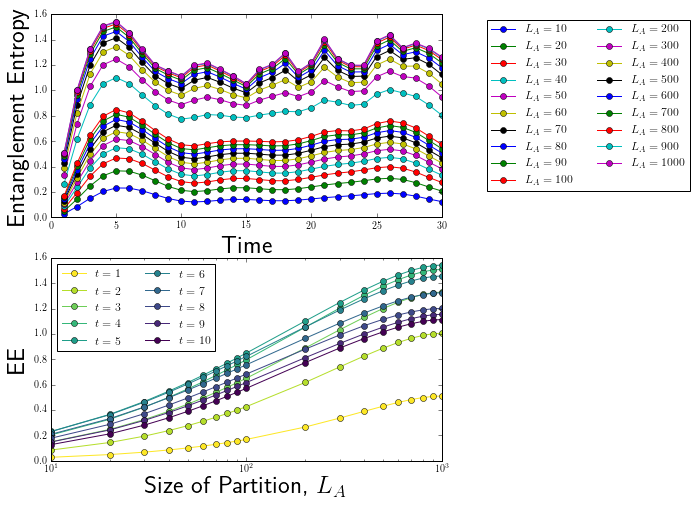

In [97]:
plt.figure(figsize=(7,8))
plt.subplot(2,1,1)
for q in range(np.size(La_arr)):
    plt.plot(tarr,entropyarr[:,q],'-o',label='$L_A=%d$'% La_arr[q])
plt.xlim((0,30))
plt.legend(bbox_to_anchor=(1.65,1),numpoints=1,ncol=2)
plt.ylabel("Entanglement Entropy", fontsize=25)
plt.xlabel("Time",fontsize=25)

#scaling
plt.subplot(2,1,2)
cmap=plt.cm.get_cmap('viridis_r')
colors = cmap(np.linspace(0,1,10))#np.size(tarr)))
for q in range(10):#np.size(tarr)):
    plt.semilogx(La_arr,entropyarr[q,:],'-o',color=colors[q],label='$t=%d$'% tarr[q])
#plt.xlim((0,10))
plt.ylabel("EE", fontsize=25)
plt.xlabel("Size of Partition, $L_A$",fontsize=25)
plt.legend(numpoints=1,loc=2,ncol=2)#bbox_to_anchor=(1.65,1.1))